In [296]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [297]:
Fs = 22050

In [298]:
x = np.load('values/x.npy')
x_h = np.load('values/x_h.npy')
x_p = np.load('values/x_p.npy')
x_h_onset = np.load('values/x_h_onset.npy')
x_p_onset = np.load('values/x_p_onset.npy')
x_loudness = np.load('values/x_loudness.npy')
x_h_loudness = np.load('values/x_h_loudness.npy')
x_p_loudness = np.load('values/x_p_loudness.npy')

In [299]:
sr = Fs

In [300]:
x_p_onset_frames = librosa.time_to_frames(x_p_onset[:, 0], sr=sr)
index = x_p_loudness[x_p_onset_frames]>.06
x_p_onset = np.vstack([librosa.frames_to_time(x_p_onset_frames[index]), x_p_onset[index,1]]).T

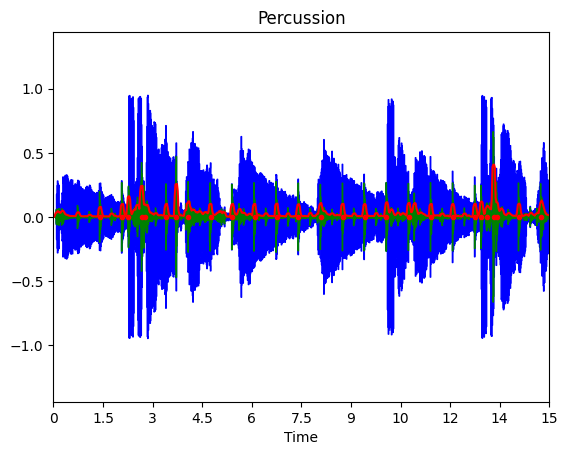

In [301]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_p, sr=sr, color='green', axis='time')
plt.plot(librosa.times_like(x_p_loudness), x_p_loudness, color='red')
plt.scatter(x_p_onset[:, 0], np.zeros_like(x_p_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 15)
plt.title('Percussion')
plt.show()

In [302]:
x_h_onset_frames = librosa.time_to_frames(x_h_onset[:, 0], sr=sr)
index = x_loudness[x_h_onset_frames]>.15
x_h_onset = np.vstack([librosa.frames_to_time(x_h_onset_frames[index]), x_h_onset[index,1]]).T

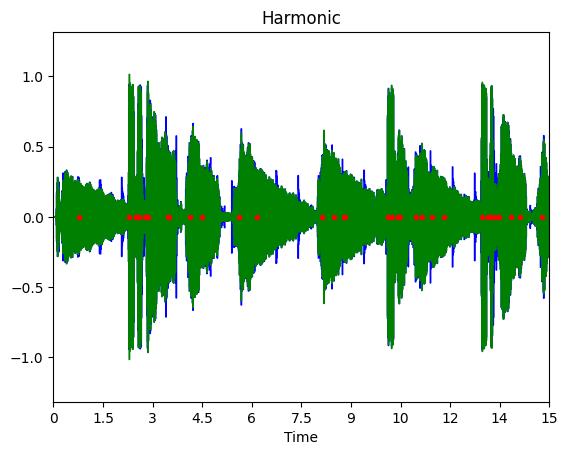

In [303]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_h, sr=sr, color='green', axis='time')
plt.scatter(x_h_onset[:, 0], np.zeros_like(x_h_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 15)
plt.title('Harmonic')
plt.show()

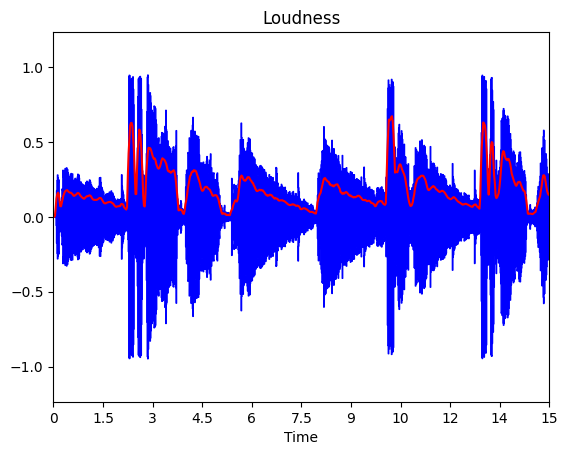

In [304]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
plt.plot(librosa.times_like(x_loudness), x_loudness, color='red')
plt.xlim(0, 15)
plt.title('Loudness')
plt.show()

In [305]:
fps = 30
n_frames = int(librosa.samples_to_time(len(x), sr=sr)*fps)

In [306]:
beats_h = np.rint(x_h_onset[:,0]*fps).astype(int).tolist()
beats_p = np.rint(x_p_onset[:,0]*fps).astype(int).tolist()

In [307]:
# +2 for the last two frames
frames = np.zeros((n_frames, 8, 8, 3))
rgb = np.array([1, 0, 0])

for i in range(n_frames-3):
    t0 = i/fps
    t1 = (i+1)/fps
    t2 = (i+2)/fps

    f0 = librosa.time_to_frames(t0, sr=sr)
    f1 = librosa.time_to_frames(t1, sr=sr)
    f2 = librosa.time_to_frames(t2, sr=sr)

    loudness0 = x_loudness[f0]
    loudness1 = x_loudness[f1]
    loudness2 = x_loudness[f2]
    
    c0 = rgb*loudness0
    c1 = rgb*loudness1
    c2 = rgb*loudness2

    frame0 = frames[i]
    frame1 = frames[i+1]
    frame2 = frames[i+2]
    frame3 = frames[i+3]

    if i in beats_p:
        # do a ripple from the outside
        frame0[0,:] += 0.5*c0
        frame0[7,:] += 0.5*c0
        frame0[1:7,0] += 0.5*c0
        frame0[1:7,7] += 0.5*c0

        frame1[0,:] += 0.2*c0
        frame1[7,:] += 0.2*c0
        frame1[1:7,0] += 0.2*c0
        frame1[1:7,7] += 0.2*c0

        frame2[0,:] += 0.1*c0
        frame2[7,:] += 0.1*c0
        frame2[1:7,0] += 0.1*c0
        frame2[1:7,7] += 0.1*c0
        
        # frame1[:2,:] += 0.25*c1
        # frame1[6:,:] += 0.25*c1
        # frame1[2:6,:2] += 0.25*c1
        # frame1[2:6,6:] += 0.25*c1
        
        # frame2[:3,:] += 0.25*c2
        # frame2[5:,:] += 0.25*c2
        # frame2[3:5,:3] += 0.25*c2
        # frame2[3:5,5:] += 0.25*c2
        
    if i in beats_h:
        # do a ripple from inside
        frame0[3:5, 3:5] += 1*c0

        frame1[3:5, 3:5] += 0.5*c1
        frame1[3:5, 2] += 0.5*c1
        frame1[3:5, 5] += 0.5*c1
        frame1[5, 3:5] += 0.5*c1
        frame1[2, 3:5] += 0.5*c1

        # frame2[2:6, 2:6] += 0.25*c2
        # frame2[3:5, 1] += 0.25*c2
        # frame2[3:5, 6] += 0.25*c2
        # frame2[1, 3:5] += 0.25*c2
        # frame2[6, 3:5] += 0.25*c2
        frame2[3:5, 3:5] += 0.2*c1
        frame2[3:5, 2] += 0.2*c1
        frame2[3:5, 5] += 0.2*c1
        frame2[5, 3:5] += 0.2*c1
        frame2[2, 3:5] += 0.2*c1
    
        frame3[3:5, 3:5] += 0.1*c1
        frame3[3:5, 2] += 0.1*c1
        frame3[3:5, 5] += 0.1*c1
        frame3[5, 3:5] += 0.1*c1
        frame3[2, 3:5] += 0.1*c1

    frame0 = np.clip(frame0, 0, 1)
    frame1 = np.clip(frame1, 0, 1)
    frame2 = np.clip(frame2, 0, 1)
    frame3 = np.clip(frame3, 0, 1)
    
    frames[i] = frame0
    frames[i+1] = frame1
    frames[i+2] = frame2
    frames[i+3] = frame3

In [308]:
np.set_printoptions(precision=2)

print(frames[33,:,:,0])
print(frames[34,:,:,0])
print(frames[35,:,:,0])

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [309]:
np.save('values/frames.npy', frames)

In [310]:
frames.shape

(4519, 8, 8, 3)